# 光学系统分析
## 光路网络
序列光学分析效率高，非序列光学则更适用于分布式合成孔径系统。我们采用有向无圈图（Directed acyclic graph, DAG）建立光路网络模型，作为序列光学分析的广义形式。

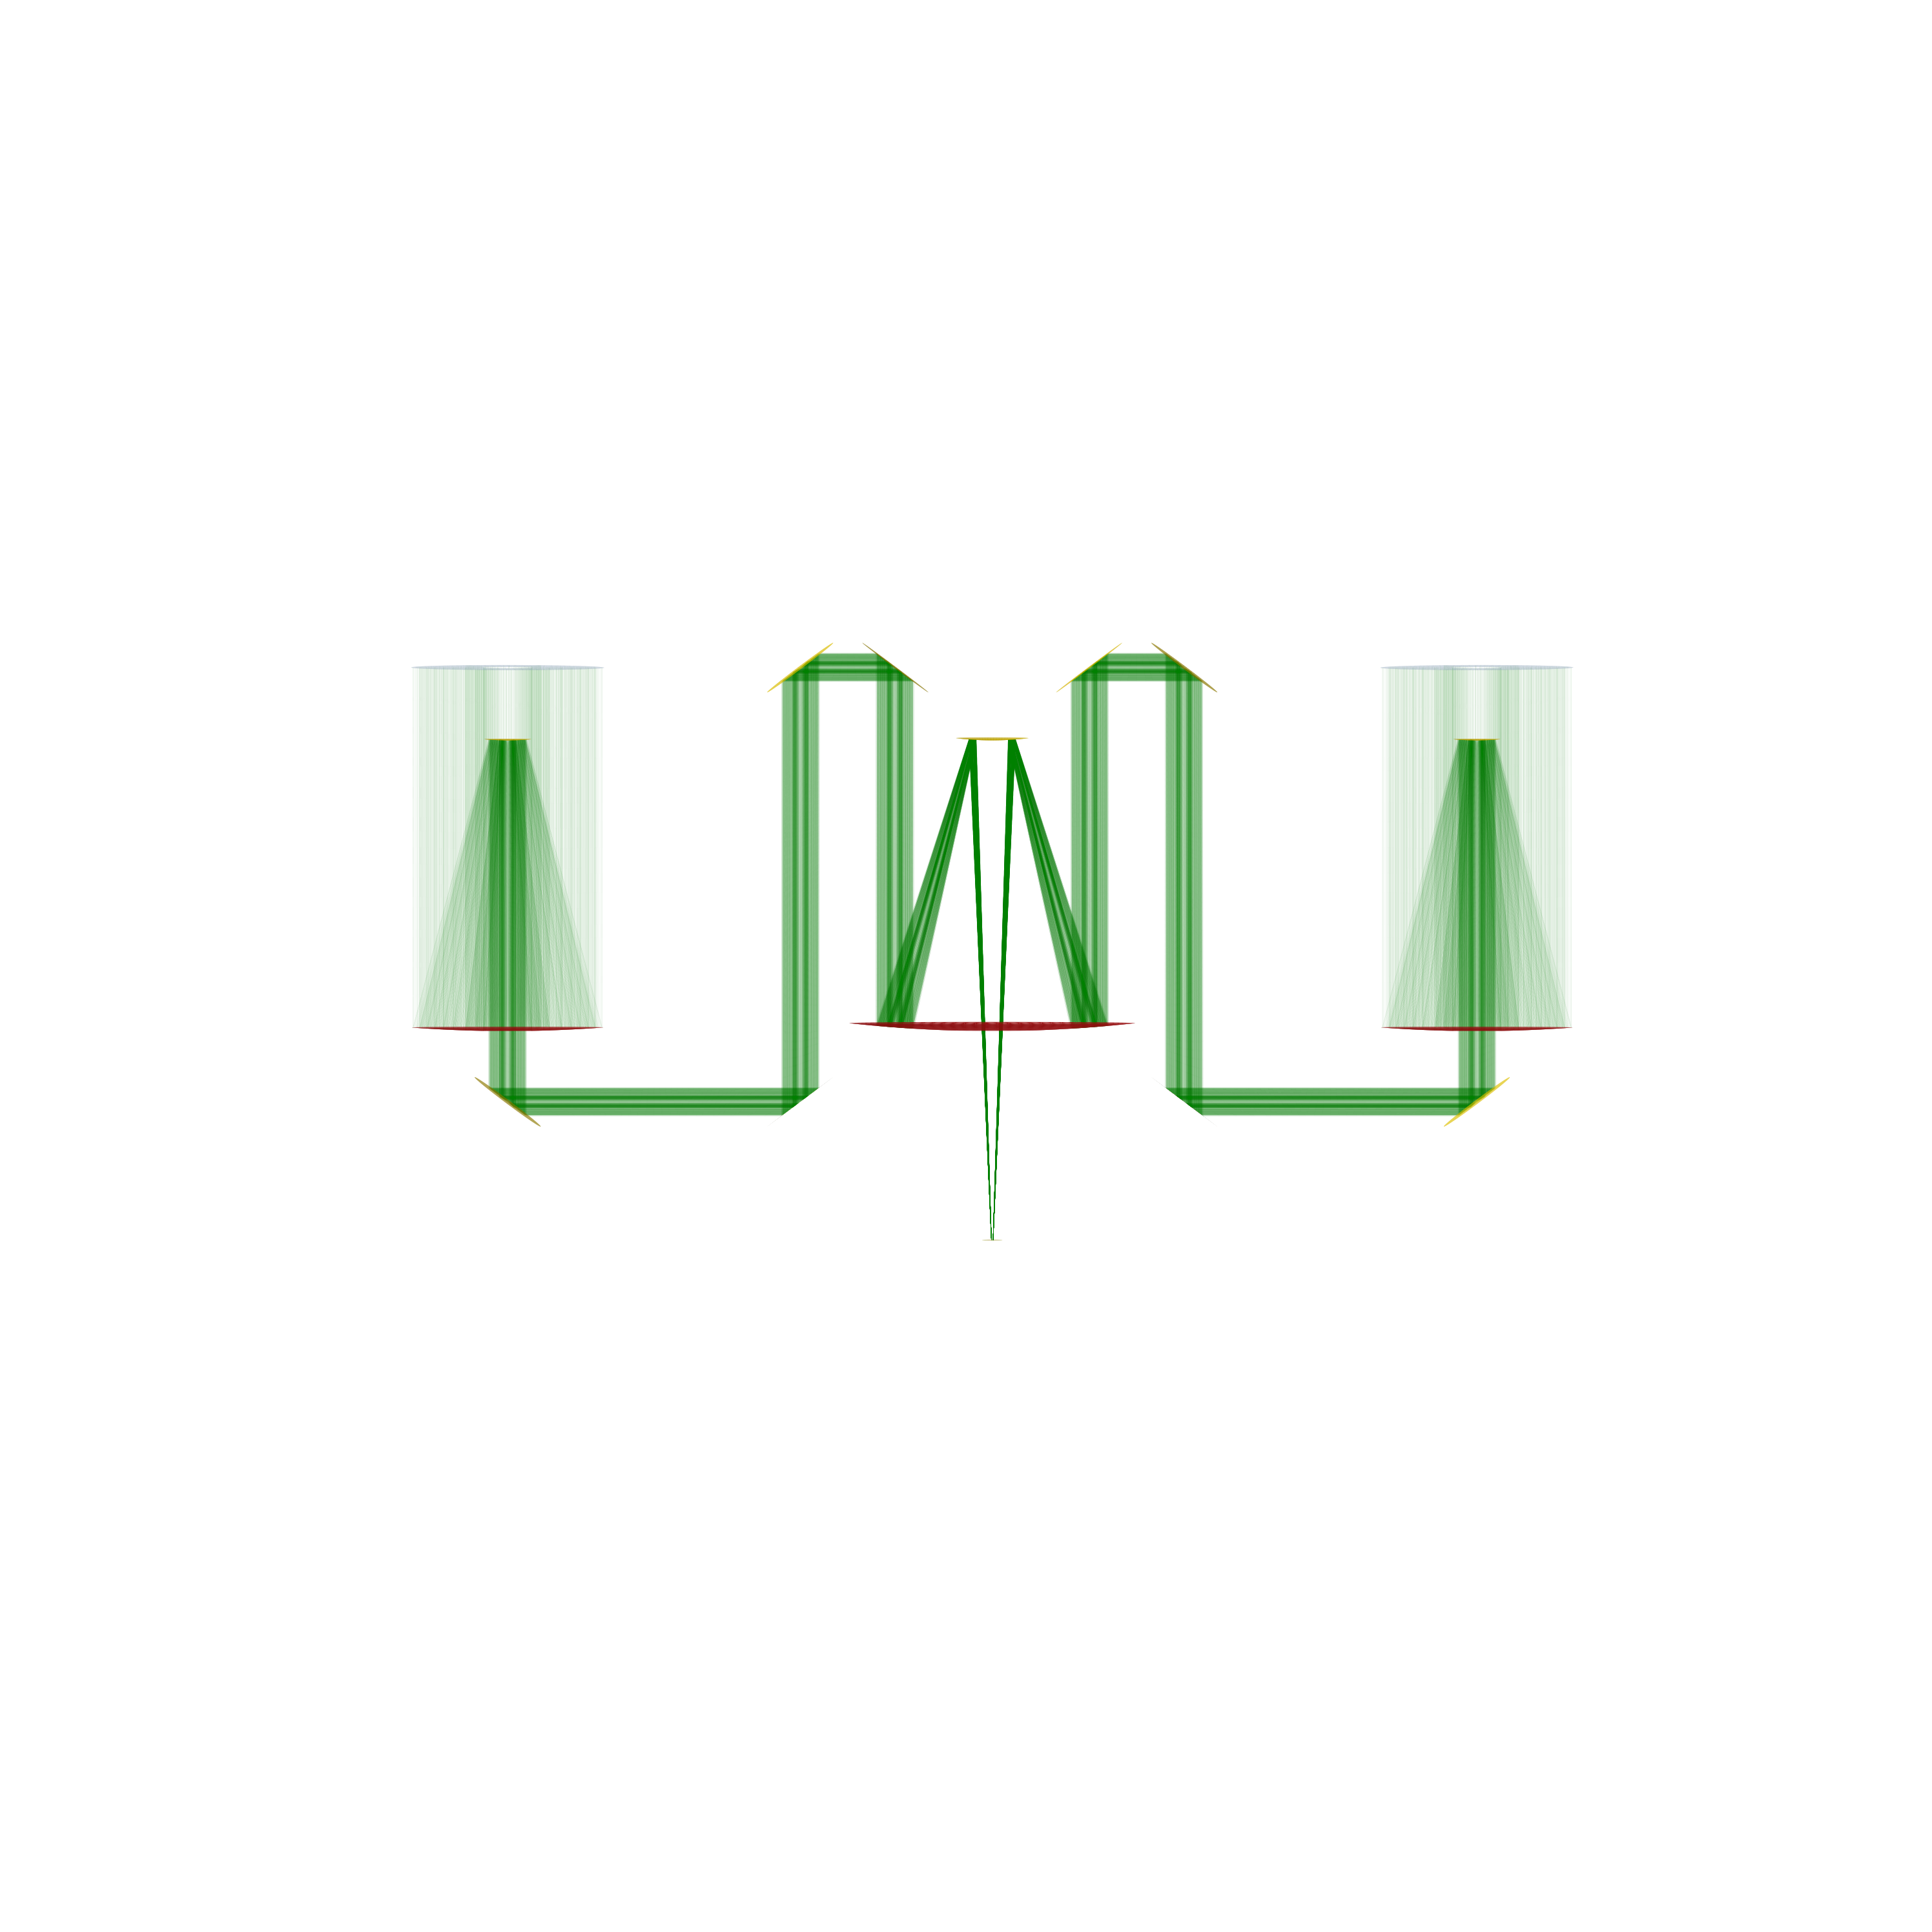

In [157]:
import pimms.optics as op
reload(op)
# 创建简化的迈克尔逊恒星干涉仪模型，初始基线10米
sim=op.SIM(init_b=10.)
# 创建天顶无穷远光源
src=op.LightSource((0., 0., 1e5))
# 创建光路网络，并以上述光源作为参考光源，通过非序列光线追踪，确定光路，创建光路网络
opn=op.OpticalPathNetwork(sim, light_source=src)
p,q=src(sim.get_entrance(), 100, 1, sampling='crosshair')
pt,mt=sim.trace_network(q,opn)
tris,zs,extent=sim.draw(draw_virtual=True,view_angles=(0,-90),figure_size=(3000,3000),raytrace=pt)

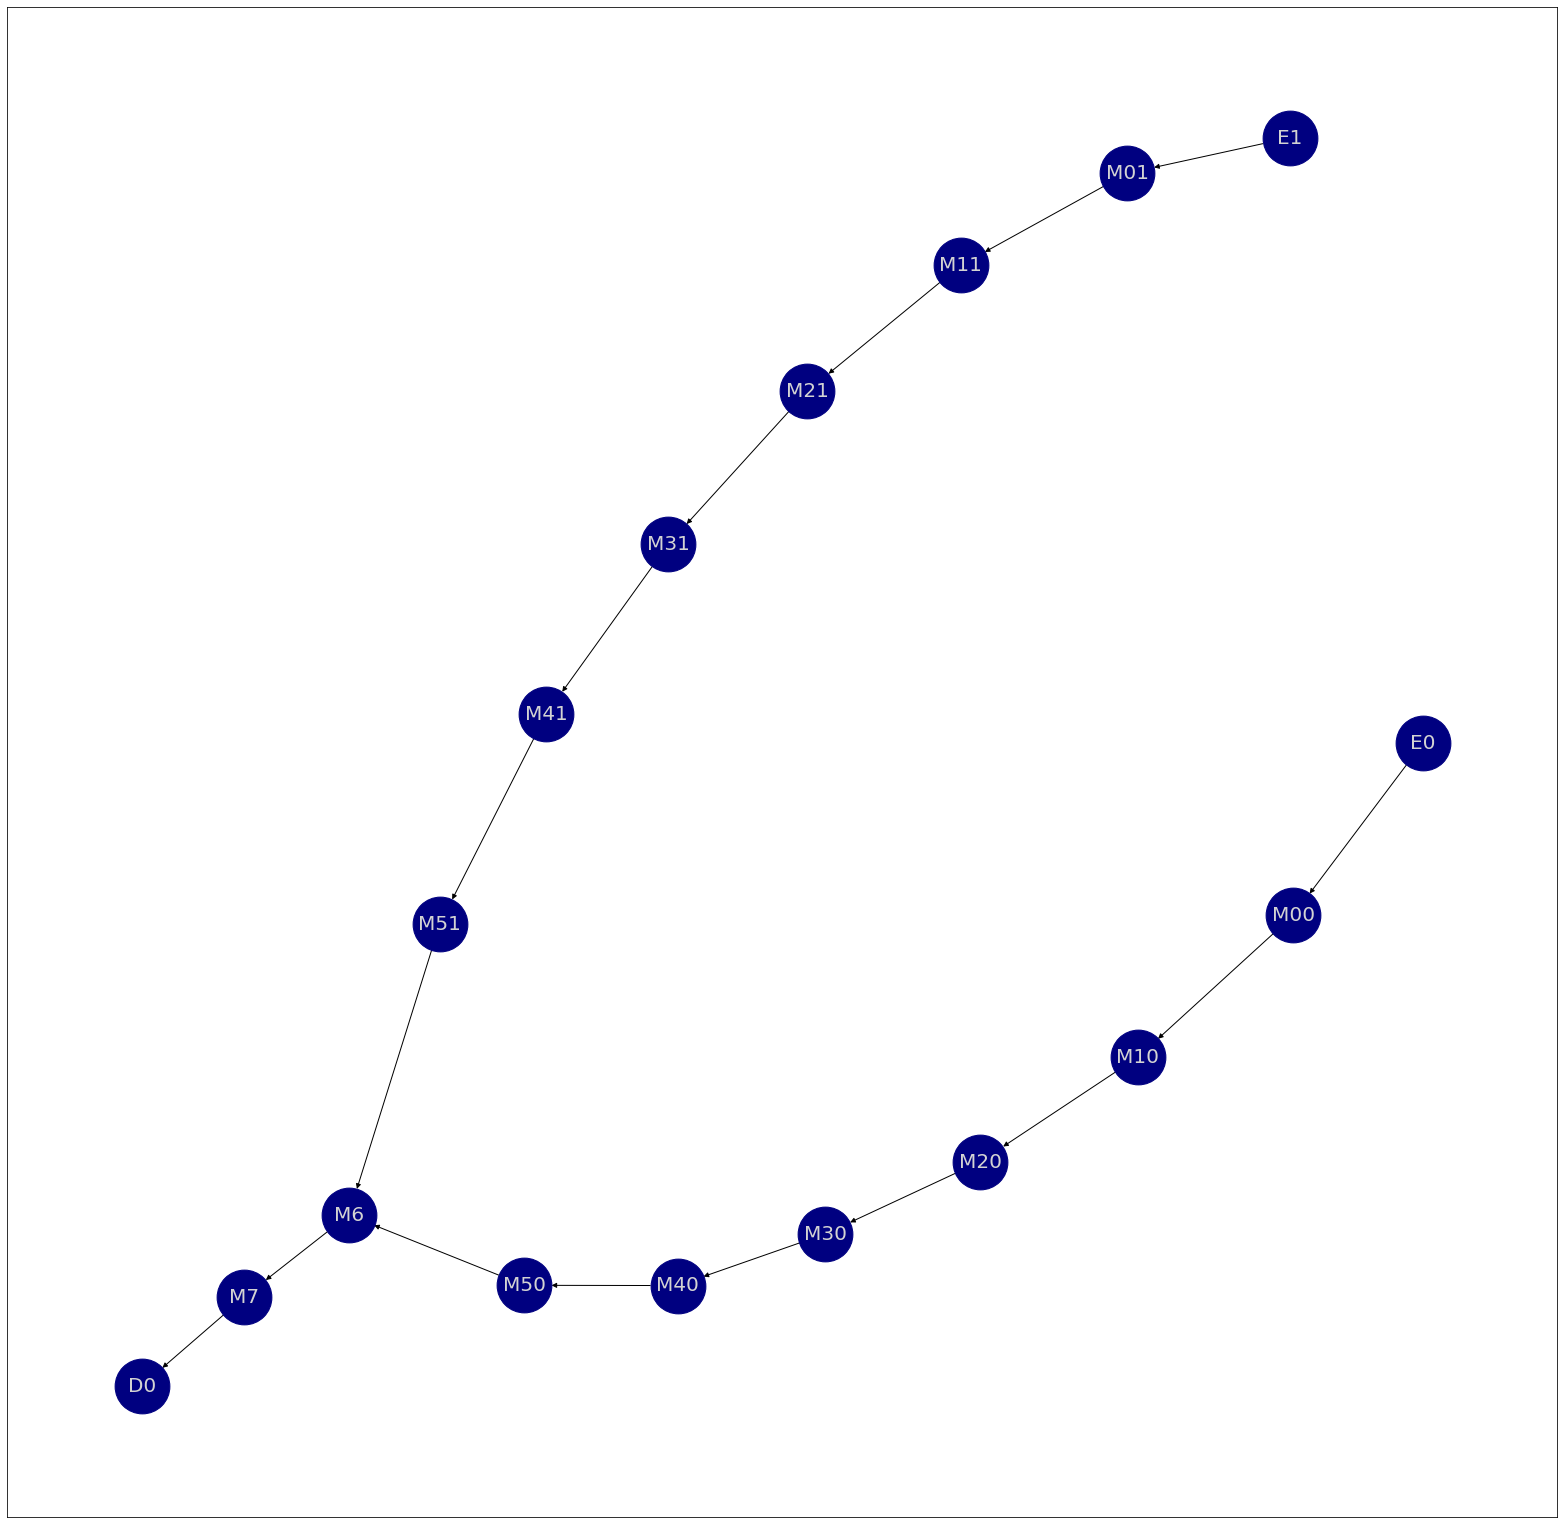

In [153]:
opn.draw(figure_size=(2000,2000),node_size=3000,font_size=20)

建立光路网络后，基于网络进行光线追踪，相比非序列光线追踪，可大幅度提升效率。

In [135]:
%timeit sim.trace(q)
%timeit sim.trace_network(q,opn)
pt0,mt0=sim.trace(q)
pt1,mt1=sim.trace_network(q,opn)

## 确定系统光阑

Aperture stops:
  M00
  M01
Effective area: 5.90E+00 square meter
Field stop(s):
  D0


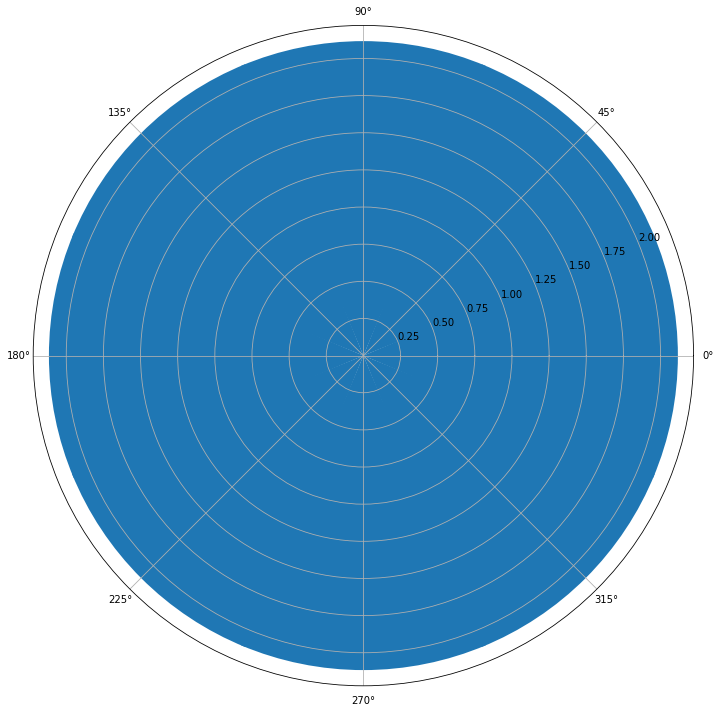

In [313]:
# 寻找系统孔径光阑
astops=opn.aperture_stop()
print("Aperture stops:")
for astop in astops:
    print("  {}".format(astop.name))
# 估算系统几何有效通光面积
area=opn.effective_area()
print("Effective area: {:.2E} square meter".format(area))
# 寻找系统视场光阑并估算视场
fstops,az,zmin,zmax=opn.field_stop(num_spokes=8)
z=np.rad2deg(.5*(zmin+zmax))*60.
print("Field stop(s):")
for fstop in fstops:
    print("  {}".format(fstop.name))
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='polar')
ax.bar(az,z)
# 绘制视场示意图，单位：角分
plt.tight_layout()

## 寻找入瞳、出瞳
在前述工具基础上，通过寻找孔径光阑在物方或像方的实像或者虚像，可以得到系统的入瞳或出瞳。
### 简单系统（卡塞格林系统）入瞳、出瞳

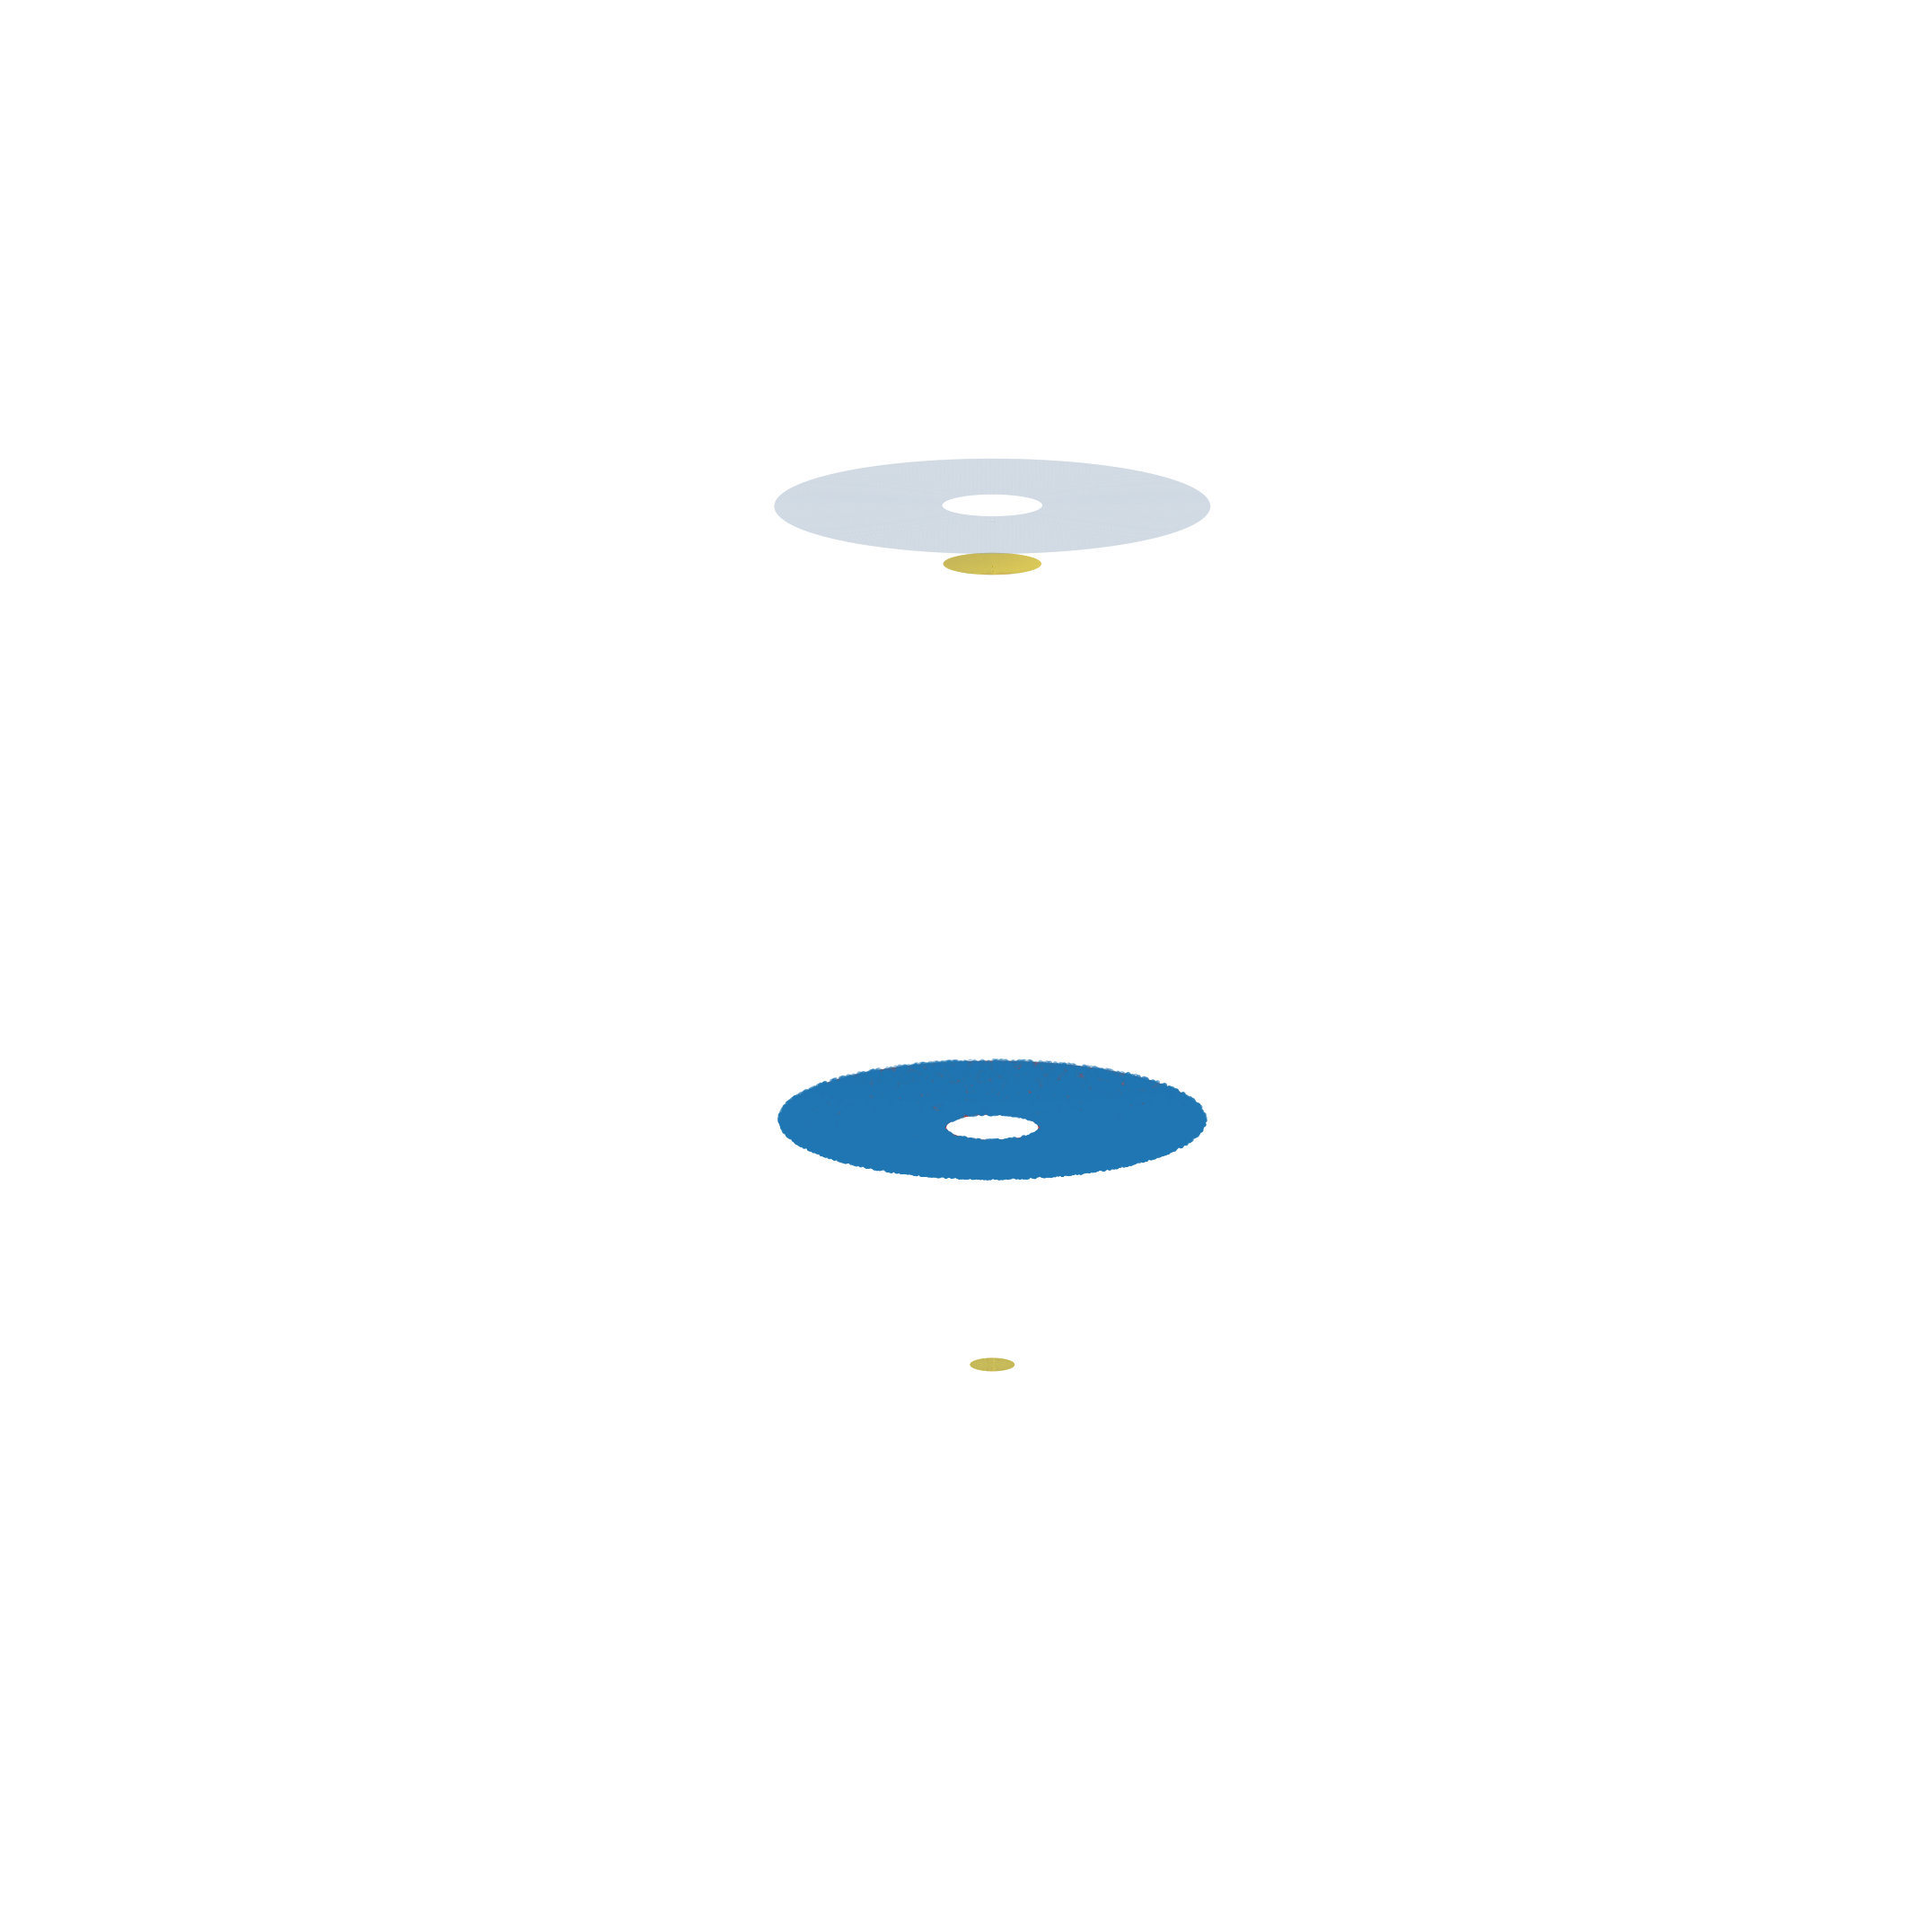

In [331]:
# 寻找入瞳，孔径光阑为主镜，因而入瞳及孔径光阑本身，与主镜重合。
tel=op.CassegrainReflector()
opn=op.OpticalPathNetwork(sim)
n=opn.find_image(
    opn.aperture_stop(), 
    'entrance', 
    perturb_dist=(1e-6,1.,1e-2,1e-6), 
    batch_rays=10000, 
    min_samplings=10000)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(n[:,0],n[:,1],n[:,2],'.')
trigs,zs,extent=tel.draw(nside=128,axes=ax,view_angles=(15,0))

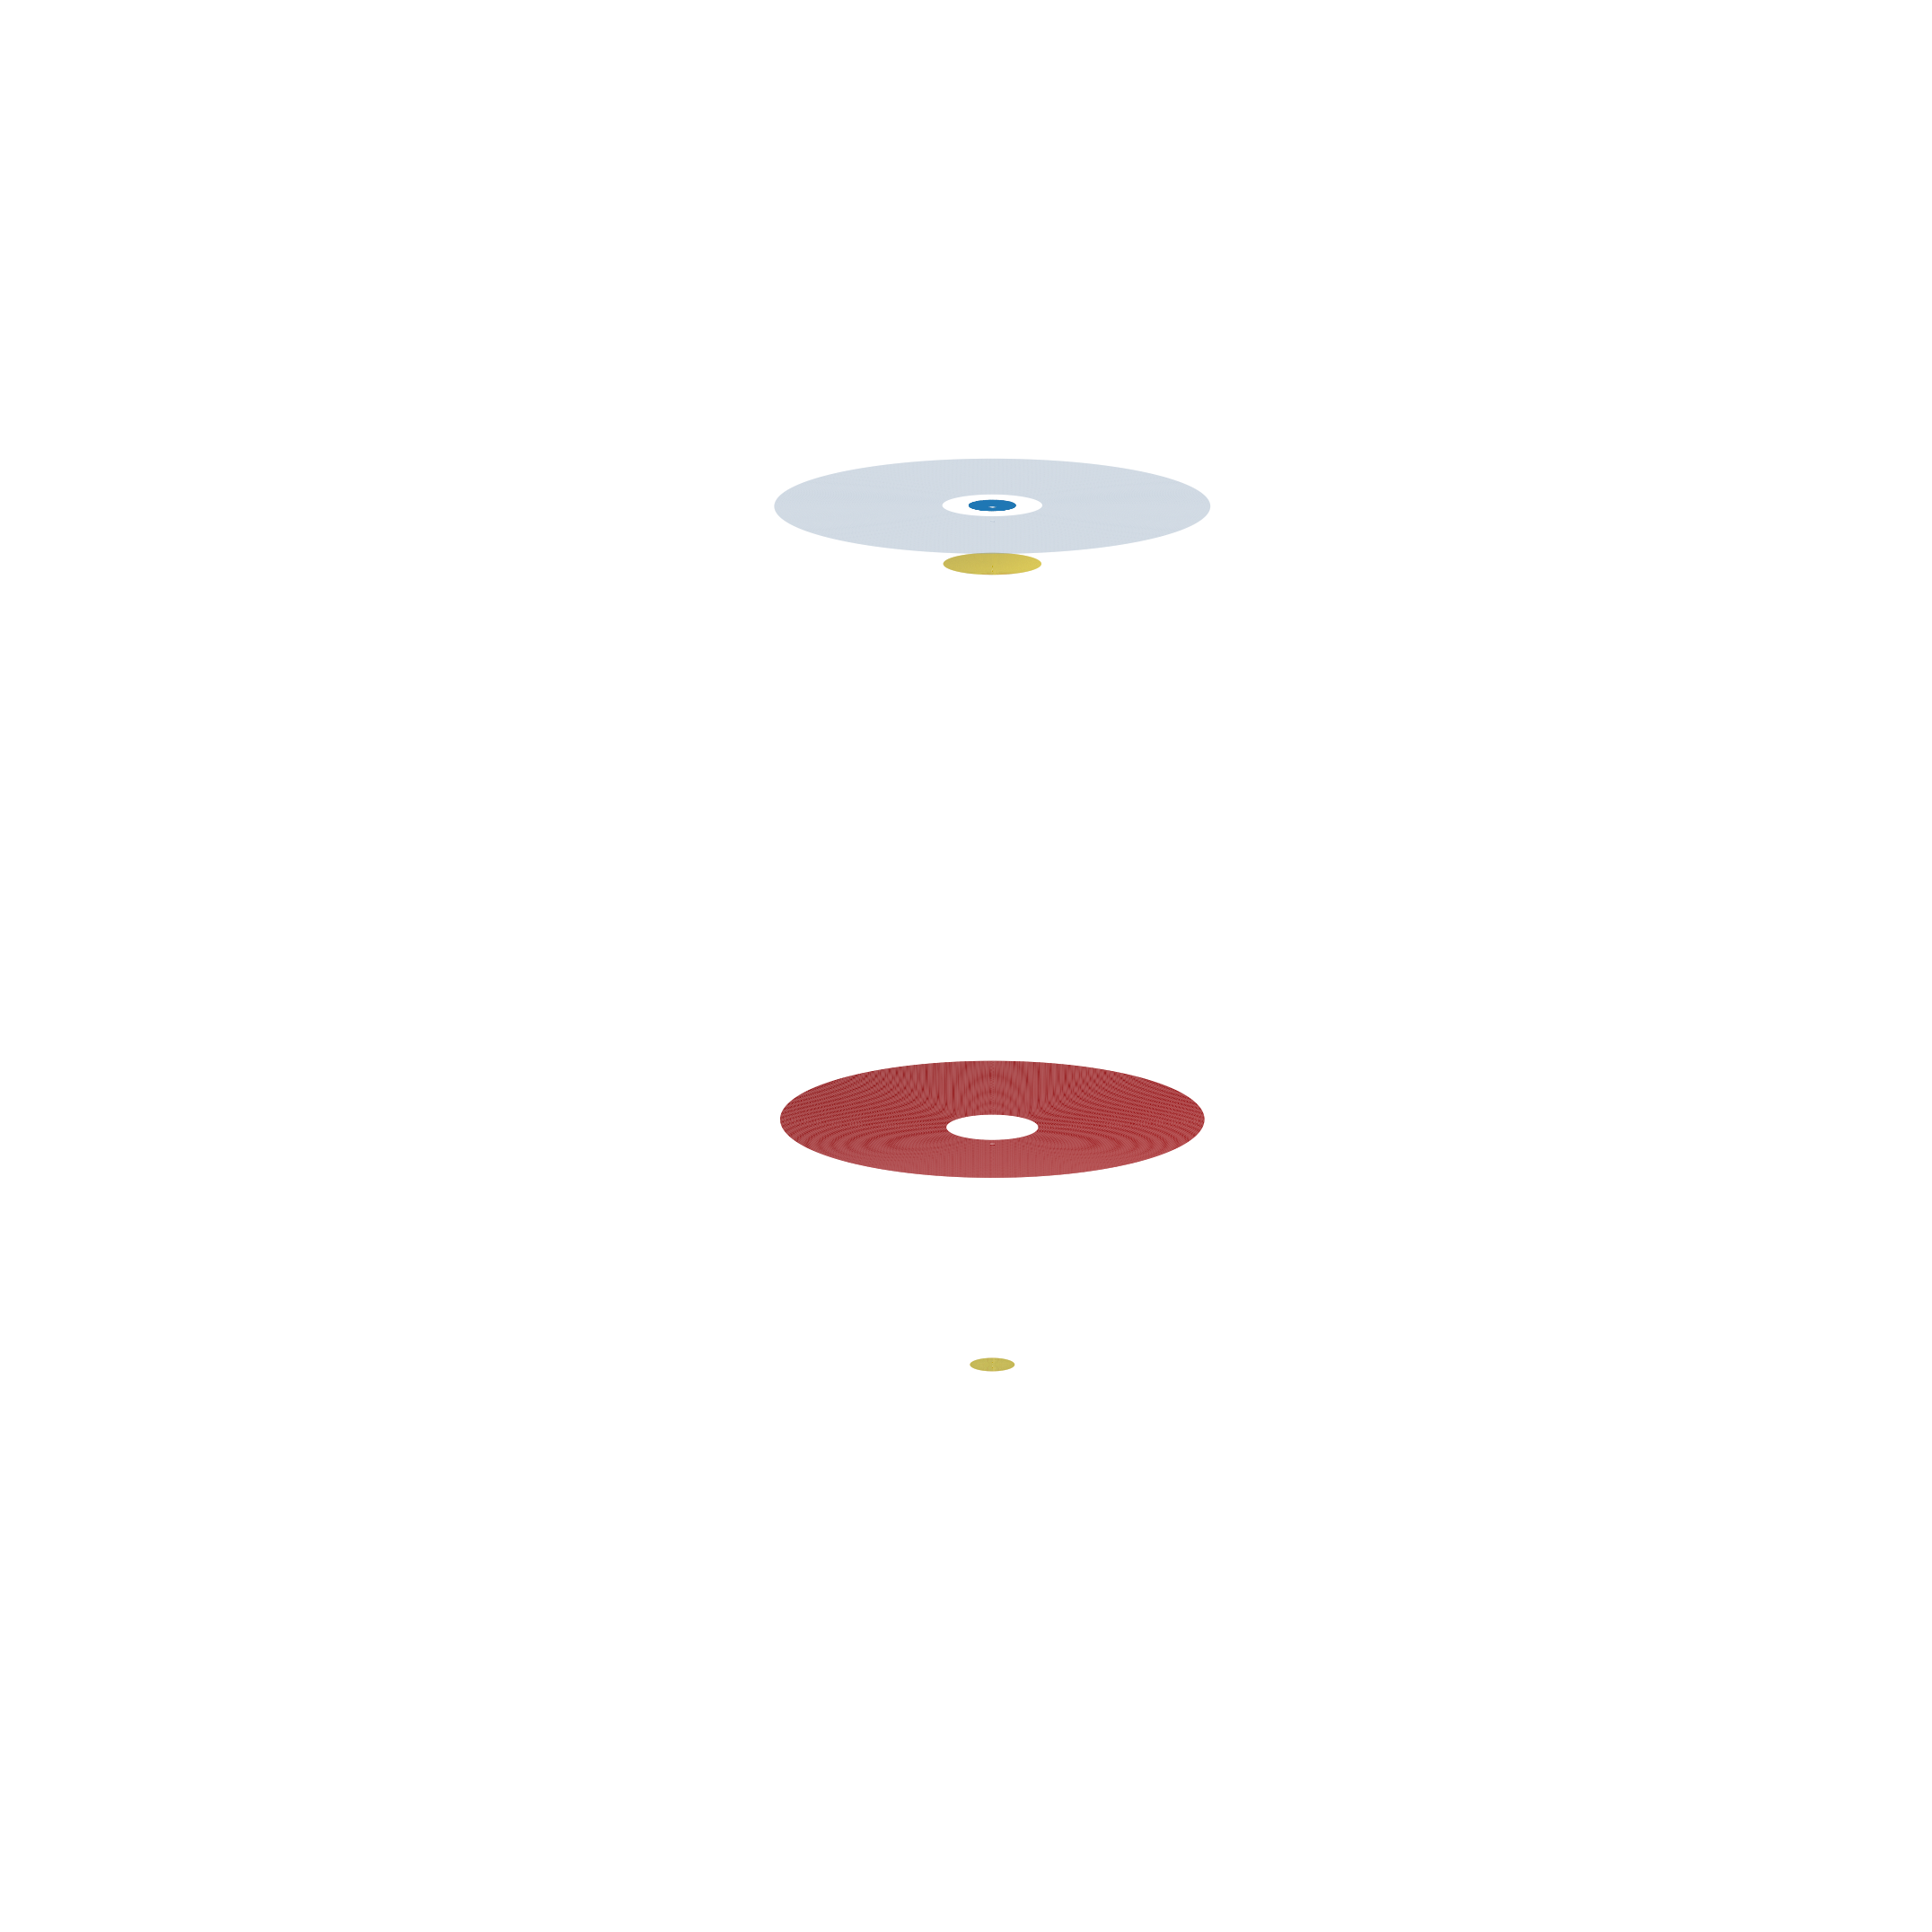

In [332]:
# 寻找出瞳，由下图可见，系统出瞳位于主镜的焦点附近（蓝色散点图标记）。
tel=op.CassegrainReflector()
opn=op.OpticalPathNetwork(sim)
n=opn.find_image(
    opn.aperture_stop(), 
    'exit', 
    perturb_dist=(1e-6,1.,1e-2,1e-6), 
    batch_rays=10000, 
    min_samplings=10000)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(n[:,0],n[:,1],n[:,2],'.',s=.1,alpha=0.2)
trigs,zs,extent=tel.draw(nside=128,axes=ax,view_angles=(15,0))

### 干涉仪系统出瞳

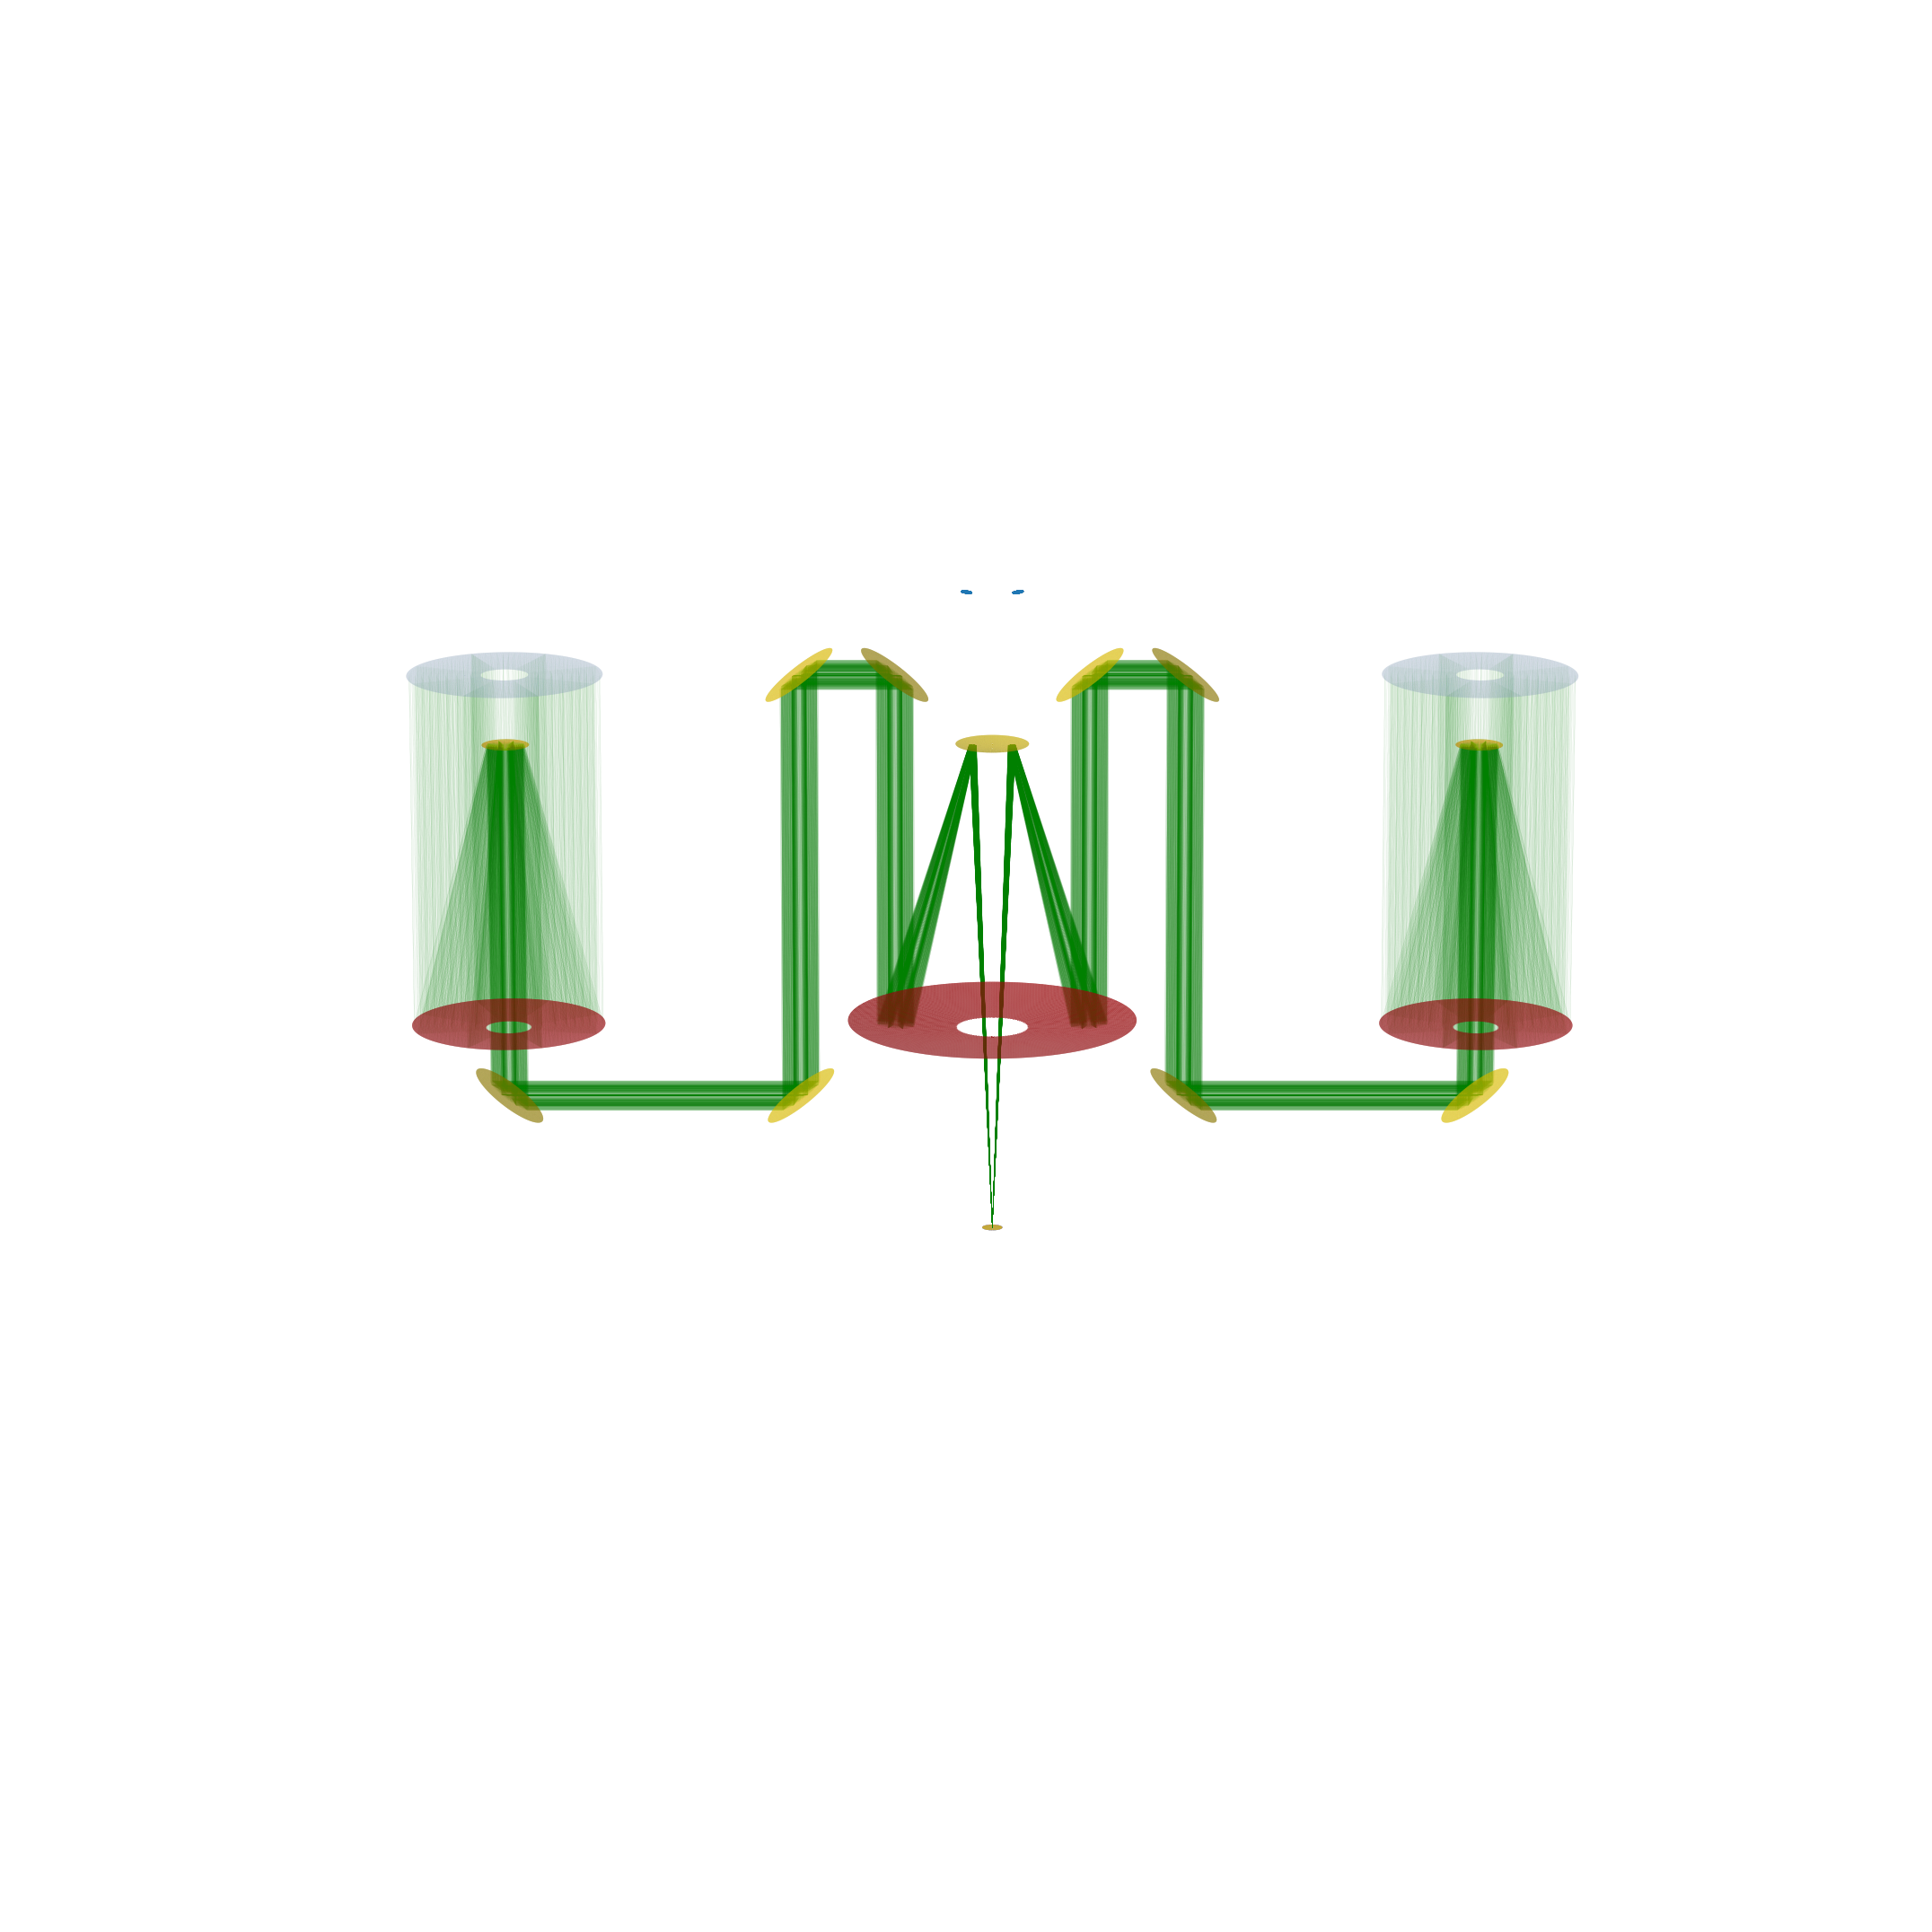

In [336]:
sim=op.SIM(init_b=10)
src=op.LightSource((0,0,np.inf))
_,q=src(sim.get_entrance(),100,1,sampling='crosshair')
opn=op.OpticalPathNetwork(sim)
pt,mt=sim.trace_network(q,opn)
n=opn.find_image(opn.aperture_stop(),'exit',perturb_dist=(1e-6,1.,1e-3,1e-6),min_samplings=10000,batch_rays=10000,max_batches=100)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(n[:,0],n[:,1],n[:,2],'.',s=.1,alpha=0.2)
trigs,zs,extent=sim.draw(nside=128,axes=ax,view_angles=(15., -90.),raytrace=pt)

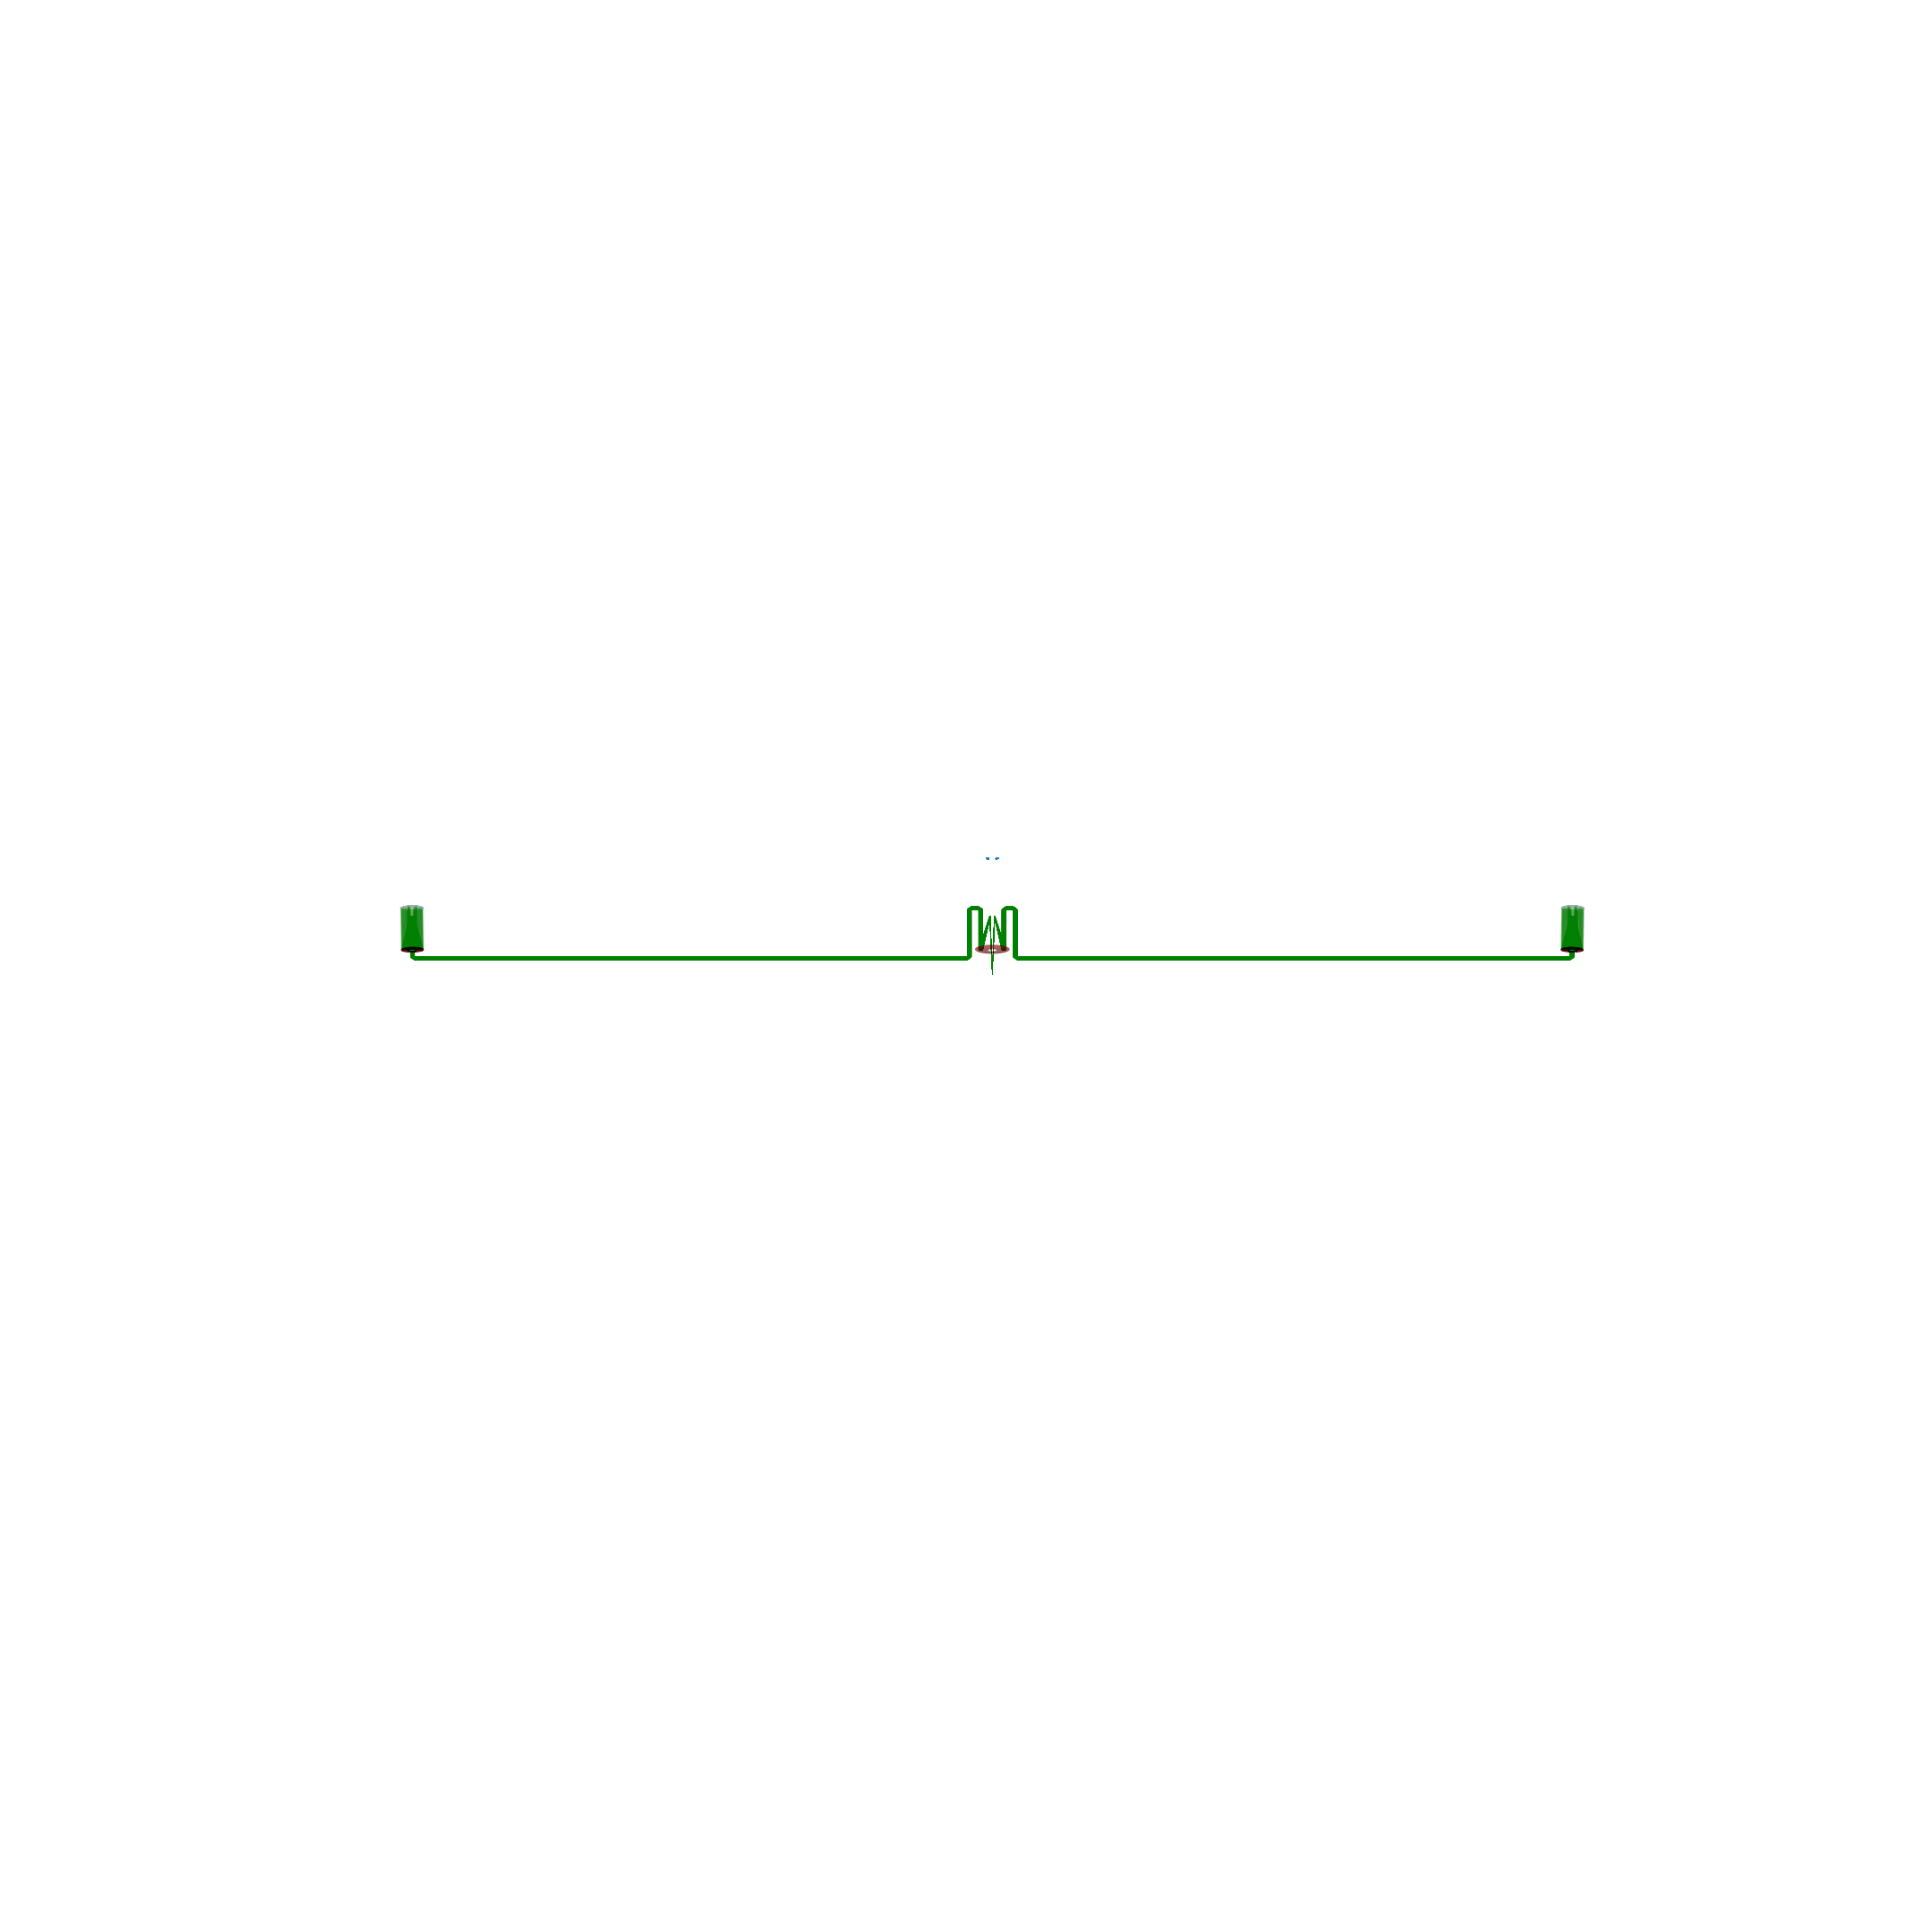

In [337]:
sim=op.SIM(init_b=100)
src=op.LightSource((0,0,np.inf))
_,q=src(sim.get_entrance(),100,1,sampling='crosshair')
opn=op.OpticalPathNetwork(sim)
pt,mt=sim.trace_network(q,opn)
n=opn.find_image(opn.aperture_stop(),'exit',perturb_dist=(1e-6,1.,1e-3,1e-6),min_samplings=10000,batch_rays=10000,max_batches=100)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(n[:,0],n[:,1],n[:,2],'.',s=.1,alpha=0.2)
trigs,zs,extent=sim.draw(nside=128,axes=ax,view_angles=(15., -90.),raytrace=pt)

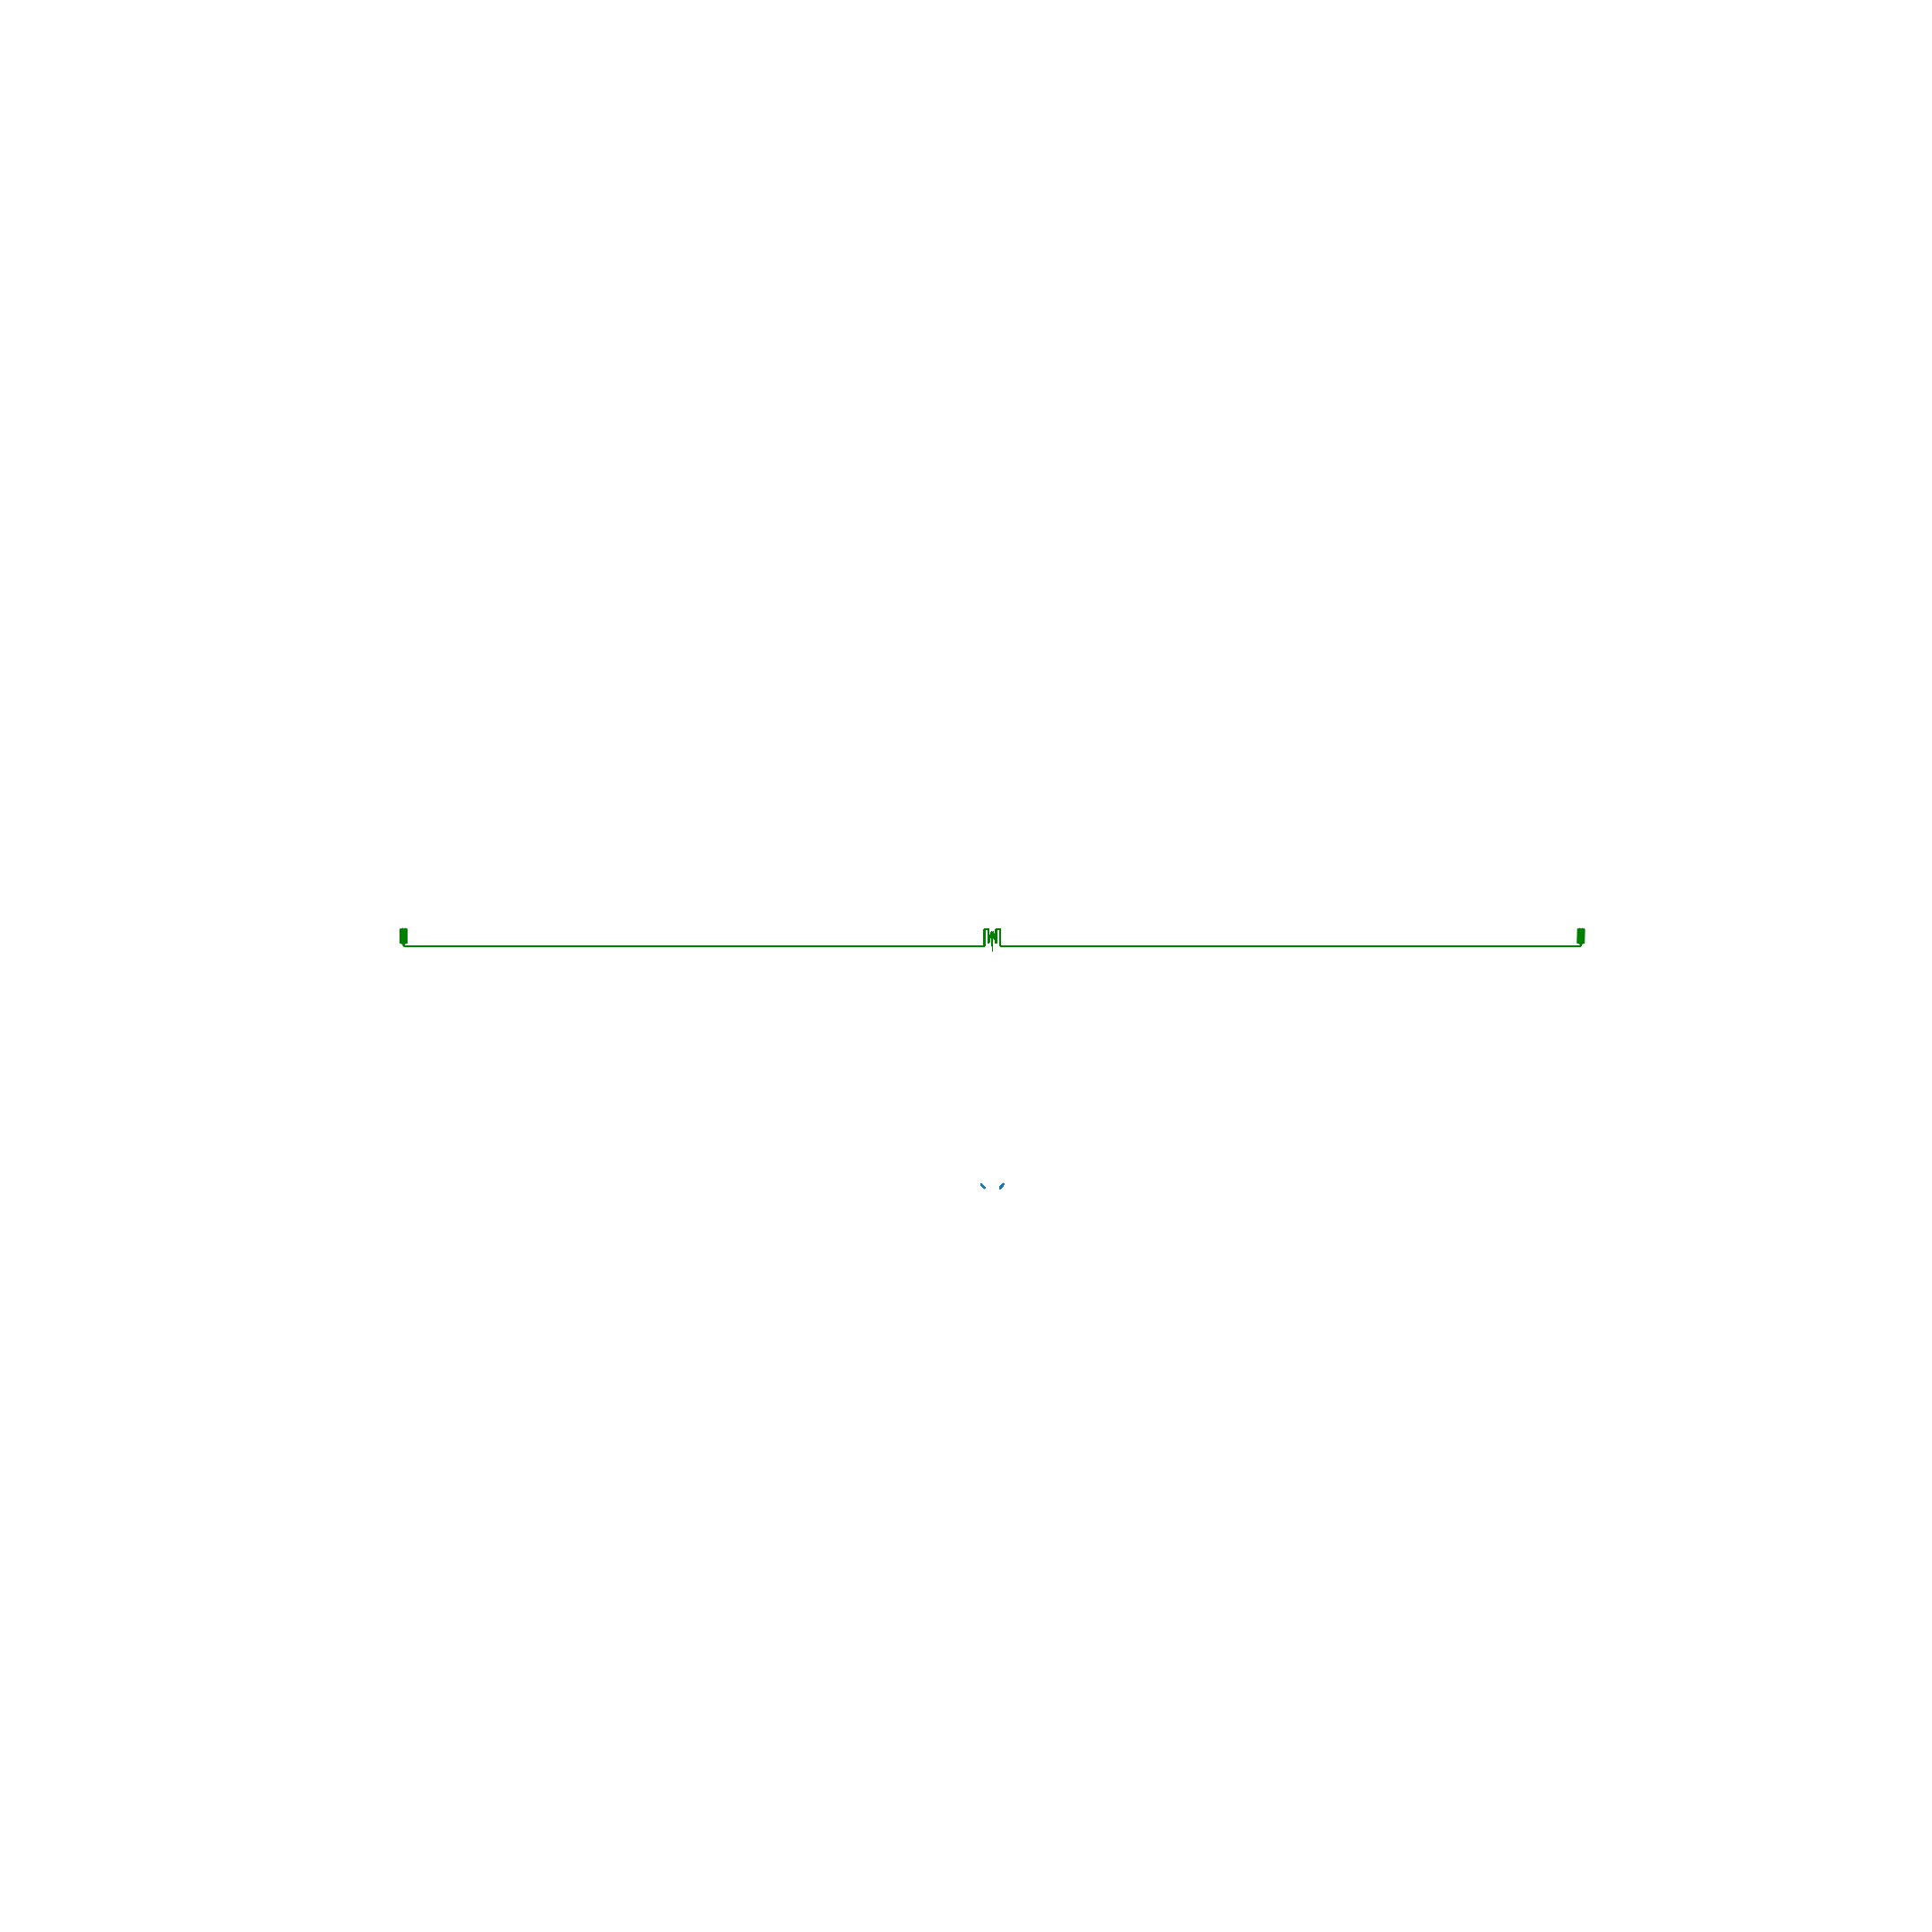

In [338]:
sim=op.SIM(init_b=300)
src=op.LightSource((0,0,np.inf))
_,q=src(sim.get_entrance(),100,1,sampling='crosshair')
opn=op.OpticalPathNetwork(sim)
pt,mt=sim.trace_network(q,opn)
n=opn.find_image(opn.aperture_stop(),'exit',perturb_dist=(1e-6,1.,1e-3,1e-6),min_samplings=10000,batch_rays=10000,max_batches=100)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(n[:,0],n[:,1],n[:,2],'.',s=.1,alpha=0.2)
trigs,zs,extent=sim.draw(nside=128,axes=ax,view_angles=(15., -90.),raytrace=pt)

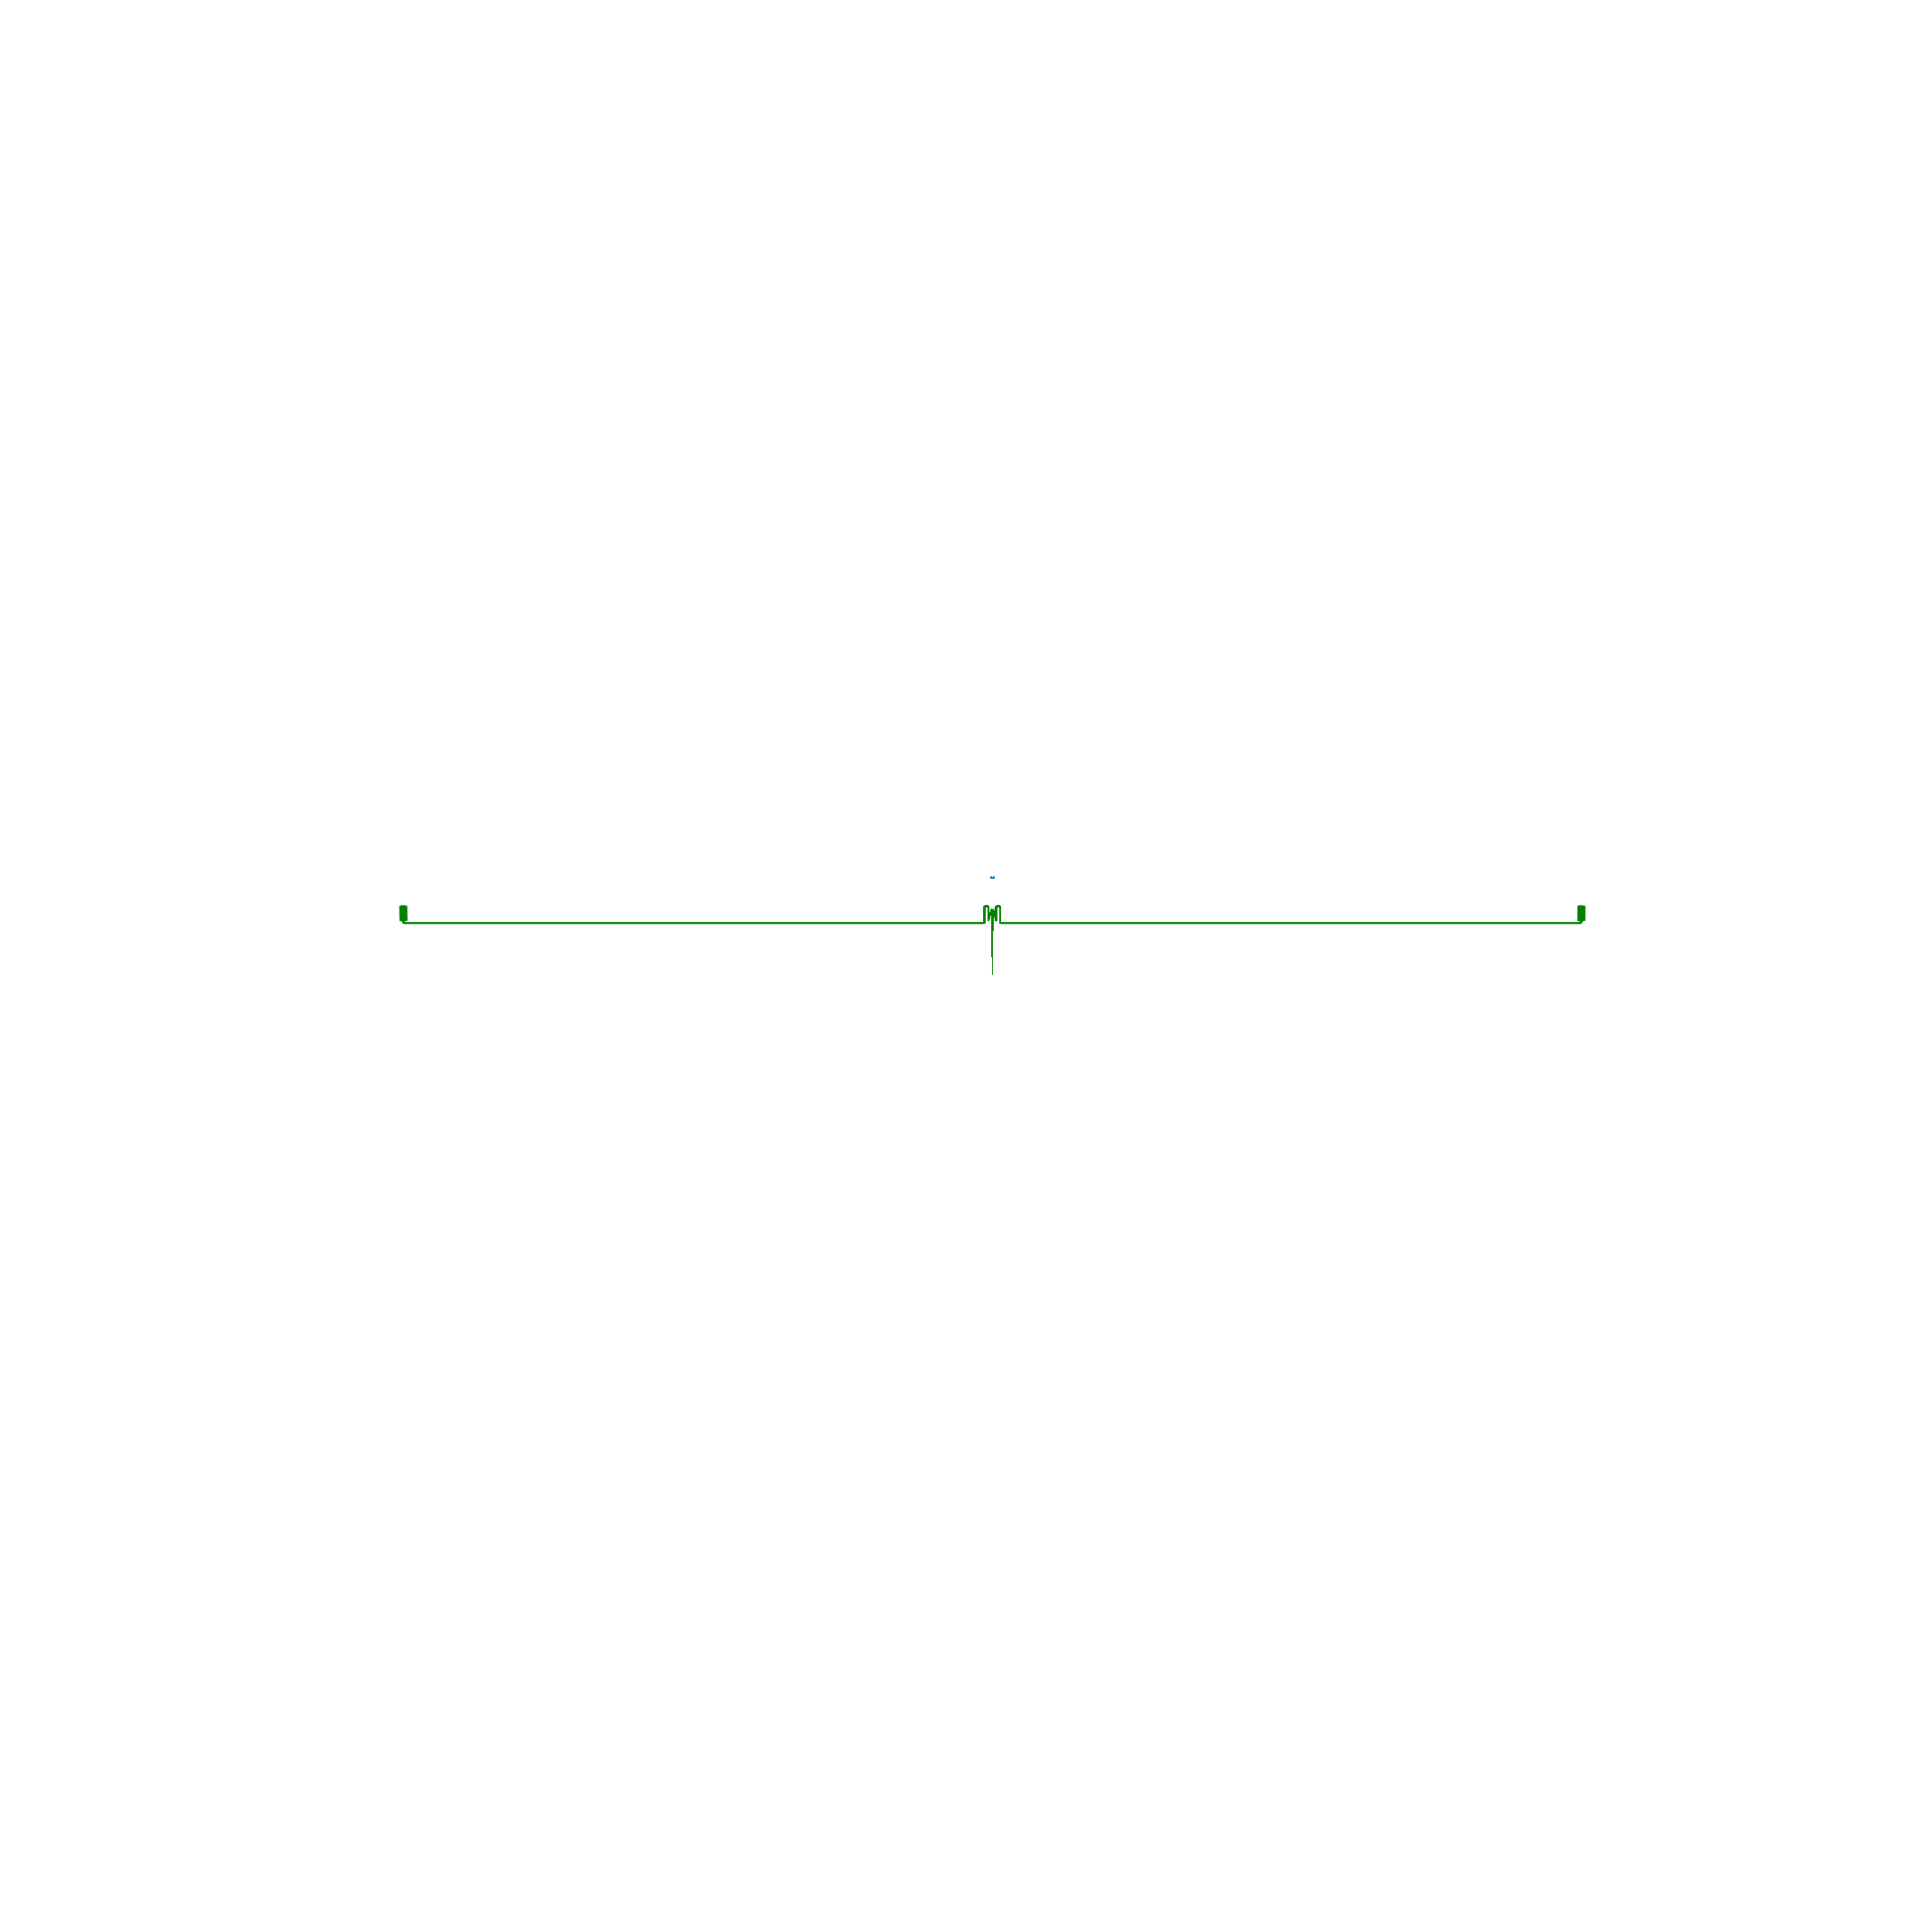

In [339]:
sim=op.SIM(init_b=300,detector_a=.5)
src=op.LightSource((0,0,np.inf))
_,q=src(sim.get_entrance(),100,1,sampling='crosshair')
opn=op.OpticalPathNetwork(sim)
pt,mt=sim.trace_network(q,opn)
n=opn.find_image(opn.aperture_stop(),'exit',perturb_dist=(1e-6,1.,1e-3,1e-6),min_samplings=10000,batch_rays=10000,max_batches=100)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(n[:,0],n[:,1],n[:,2],'.',s=.1,alpha=0.2)
trigs,zs,extent=sim.draw(nside=128,axes=ax,view_angles=(15., -90.),raytrace=pt)

观察上述实验发现，干涉仪系统出瞳情况相对复杂：
- 随着基线长度增加，出瞳面高度增加，出瞳倾斜程度增加；
- 基线长度超过一定阈值后，出瞳从物方虚像突变为像方实像；
- 增加合束器像方焦距，出瞳又从像方实像变成物方虚像。

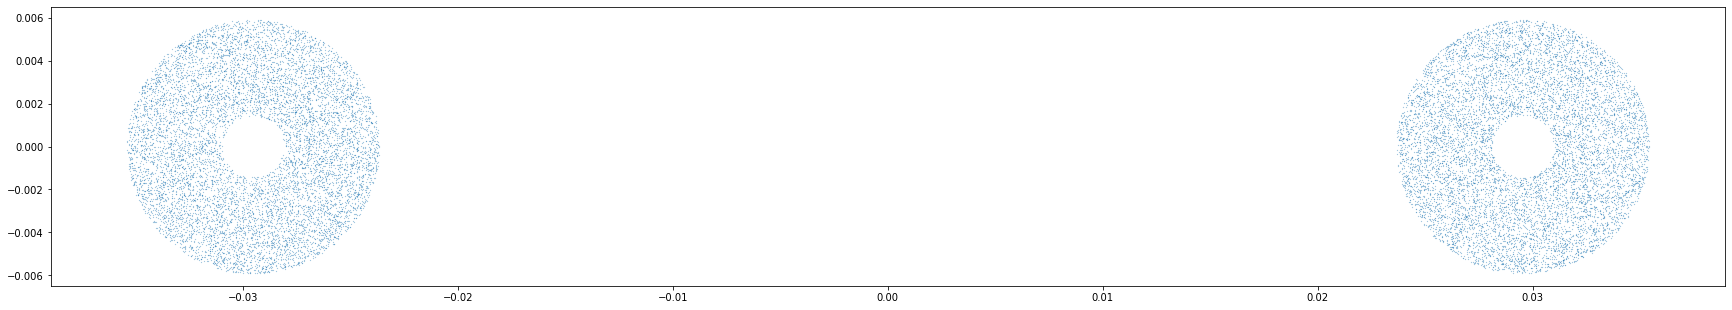

In [341]:
# 出瞳在参考球面上的投影
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111)
ax.scatter(n[:,0]/(n[:,2]),n[:,1]/(n[:,2]),.1,marker='.')
ax.set_aspect('equal')